#**Melanoma Detection Assignment** 
## Multiclass classification model using a custom convolutional neural network in TensorFlow

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers, datasets, models
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Reading Data form G-Drive uploaded only Train folder of images as per instruction under G_drive (/colab/melanoma/Train)

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/colab/melanoma/Train")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

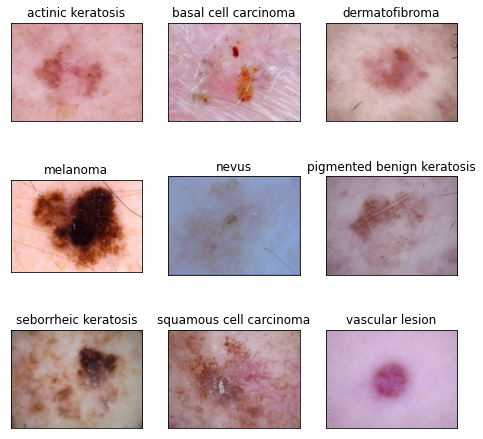

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i] +"/*.jpg"))[1]))
  plt.imshow(image)
  plt.title(class_names[i])
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

### Creating first Model as per assignment

In [11]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [14]:
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 625s 2s/step - loss: 2.0022 - accuracy: 0.2506 - val_loss: 1.8104 - val_accuracy: 0.2998
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6271 - accuracy: 0.4325 - val_loss: 1.5974 - val_accuracy: 0.4787
Epoch 3/20
56/56 [==============================] - 1s 24ms/step - loss: 1.4339 - accuracy: 0.4933 - val_loss: 1.4951 - val_accuracy: 0.4698
Epoch 4/20
56/56 [==============================] - 1s 24ms/step - loss: 1.3223 - accuracy: 0.5279 - val_loss: 1.3923 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.2422 - accuracy: 0.5619 - val_loss: 1.4233 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.1474 - accuracy: 0.5960 - val_loss: 1.4066 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.0492 - accuracy: 0.6300 - val_loss: 1.5702 - val_accuracy: 0.4720
Epoch 8/20
56

### Visualizing training results

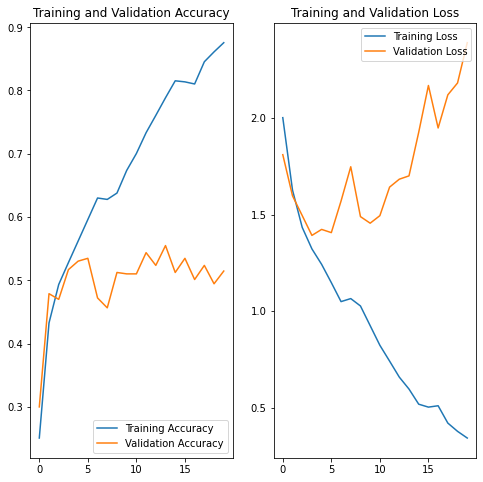

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Here is my findings 
* Its observred after few Epoch model getting overfits if i compare the train and validate though training after 6 epoch There is huge diffence in output.so this model learing in better but not able to perform well. So this is the case of **OVERFITTING**

* Along with this cleary see Model Accurecy is aprrox 50%

* This needs to regularize. 






In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Create few preprocessing layers of Data augmentation 

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ])

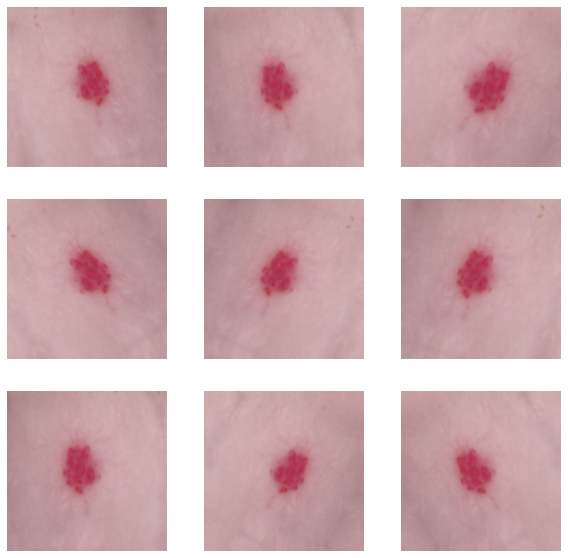

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [19]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 3s 43ms/step - loss: 1.9990 - accuracy: 0.2506 - val_loss: 1.8135 - val_accuracy: 0.3110
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.6636 - accuracy: 0.3968 - val_loss: 1.4546 - val_accuracy: 0.4966
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4511 - accuracy: 0.4905 - val_loss: 1.4022 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3690 - accuracy: 0.5240 - val_loss: 1.4291 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3413 - accuracy: 0.5285 - val_loss: 1.3408 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3132 - accuracy: 0.5262 - val_loss: 1.3566 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.2861 - accuracy: 0.5424 - val_loss: 1.4053 - val_accuracy: 0.5324
Epoch 8/20
56

### Visualizing the results

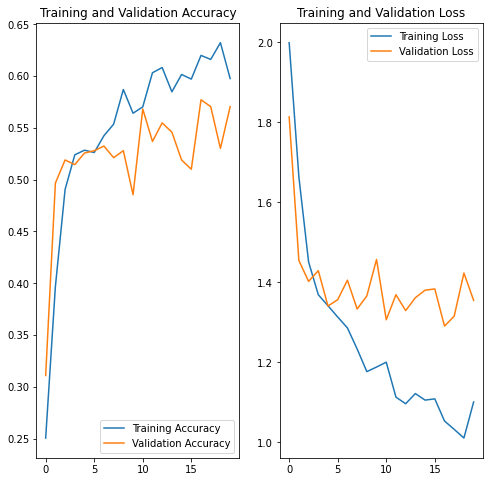

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### No there is no such big change if i compare with previous model run

### But there is a imporvement as we have used Augmented data.Lets further try to learn more out of it with next Processing Layer

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
# distribution of classes in the training dataset.
import glob
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,/content/drive/MyDrive/colab/melanoma/Train/va...,vascular lesion
1,/content/drive/MyDrive/colab/melanoma/Train/va...,vascular lesion
2,/content/drive/MyDrive/colab/melanoma/Train/va...,vascular lesion
3,/content/drive/MyDrive/colab/melanoma/Train/va...,vascular lesion
4,/content/drive/MyDrive/colab/melanoma/Train/va...,vascular lesion
...,...,...
2234,/content/drive/MyDrive/colab/melanoma/Train/de...,dermatofibroma
2235,/content/drive/MyDrive/colab/melanoma/Train/de...,dermatofibroma
2236,/content/drive/MyDrive/colab/melanoma/Train/de...,dermatofibroma
2237,/content/drive/MyDrive/colab/melanoma/Train/de...,dermatofibroma


Class=8, n=139 (6.208%)
Class=0, n=114 (5.092%)
Class=4, n=357 (15.945%)
Class=3, n=438 (19.562%)
Class=7, n=181 (8.084%)
Class=1, n=376 (16.793%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=2, n=95 (4.243%)


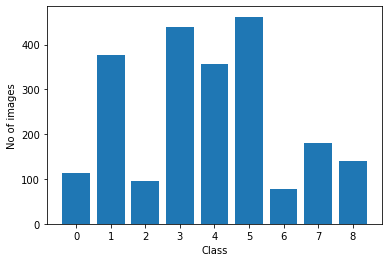

In [25]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### **Answer**:  seborrheic keratosis (Class 6)
#### - Which classes dominate the data in terms proportionate number of samples?
#### **Answer**:  pigmented benign kerotosis (Class 5)

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F49BBD08460>: 100%|██████████| 500/500 [00:21<00:00, 23.75 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F49A066FE50>: 100%|██████████| 500/500 [00:23<00:00, 21.44 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F49A0642400>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F49B4CD7700>: 100%|██████████| 500/500 [01:27<00:00,  5.69 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F49A0180CD0>: 100%|██████████| 500/500 [01:24<00:00,  5.90 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F49B4C7DCD0>: 100%|██████████| 500/500 [00:17<00:00, 28.48 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F49A0658850>: 100%|██████████| 500/500 [00:40<00:00, 12.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F49303A6820>: 100%|██████████| 500/500 [00:18<00:00, 27.32 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/colab/melanoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4930D542E0>: 100%|██████████| 500/500 [00:17<00:00, 28.33 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data. --------

In [29]:
import glob
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:5]

['/content/drive/MyDrive/colab/melanoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0025578.jpg_899842ea-0a9c-4bdc-bf68-94ed20377d3f.jpg',
 '/content/drive/MyDrive/colab/melanoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0028431.jpg_c8088acc-ccf0-4542-98ef-2ce569fd7f79.jpg',
 '/content/drive/MyDrive/colab/melanoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0024662.jpg_1739ba0c-1c89-44fa-adfc-30a74ad80ec4.jpg',
 '/content/drive/MyDrive/colab/melanoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0033349.jpg_0d20e683-a32f-4c19-83b5-65ef249abd37.jpg',
 '/content/drive/MyDrive/colab/melanoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0028885.jpg_33fb9c84-93cb-43bf-8389-000095943a9c.jpg']

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion']

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df.append(df2)

In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#### **Todo:**  Train your model

In [39]:
epochs = 30
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30
169/169 [==============================] - 36s 203ms/step - loss: 1.9570 - accuracy: 0.2506 - val_loss: 1.7230 - val_accuracy: 0.3563
Epoch 2/30
169/169 [==============================] - 34s 198ms/step - loss: 1.5258 - accuracy: 0.4186 - val_loss: 1.5243 - val_accuracy: 0.4506
Epoch 3/30
169/169 [==============================] - 35s 204ms/step - loss: 1.4228 - accuracy: 0.4492 - val_loss: 1.4239 - val_accuracy: 0.4581
Epoch 4/30
169/169 [==============================] - 34s 193ms/step - loss: 1.3219 - accuracy: 0.4978 - val_loss: 1.2612 - val_accuracy: 0.5256
Epoch 5/30
169/169 [==============================] - 33s 193ms/step - loss: 1.2661 - accuracy: 0.5217 - val_loss: 1.2770 - val_accuracy: 0.5085
Epoch 6/30
169/169 [==============================] - 33s 193ms/step - loss: 1.2373 - accuracy: 0.5211 - val_loss: 1.1696 - val_accuracy: 0.5516
Epoch 7/30
169/169 [==============================] - 34s 193ms/step - loss: 1.1920 - accuracy: 0.5423 - val_loss: 1.2559 - val_ac

#### **Todo:**  Visualize the model results

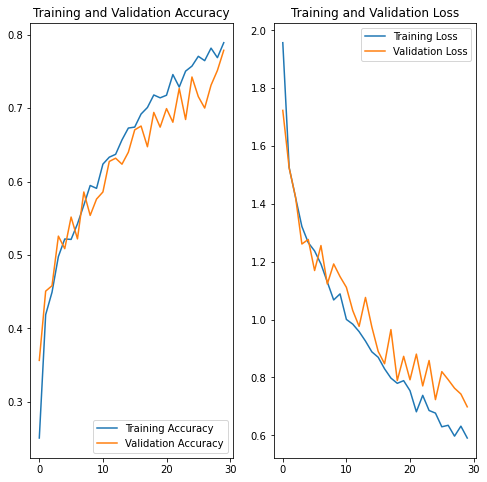

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Final Conclusion / Observation**



*   It has been Observed when we ran the first model with Raw data provided with Rescaling. Though model Train accuracy was good but it realuts in loss with Validation data Which Results in Overfitting and overall Accuracy of 50%
*   Data Augmentation technique applied and Resolving the calss imbalce result in good imporvement where no big loss with valdation found.Overall accuracy reached to 77%


